# ***ASTROPHYSICAL JETS***

# **Multi-wavelength view of an Active Galactic Nucleus (AGN) jet**
![jet multi-wavelength](https://drive.google.com/uc?export=view&id=1V5thhL8ouUBvKekIWFl26qf4soKxW7ne)

# **AGN jets driven by magnetic field close to the supermassive black hole**
<img src="https://drive.google.com/uc?export=view&id=1DbJst7z6zLiC696PiCrlqcw6UNRIbWzn" width="600">

# **AGN jets affect large scales & properties of galaxies in which they reside**
![jet cartoon large scale](https://drive.google.com/uc?export=view&id=1Z9MnWwOLYlei7dfktfec5OTfXyYs5KbL)


## **Non Relativistic Hydrodynamics**

Although AGN jets are relativistic (v~c), their effect on surroundings can be modeled in the non-relativistic regime. Following are the hydrodynamic equations that can be solved on computers. Don't worry if you cannot understand their full meaning!

### **Continuity Equation**

$$
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbf{u}) = S_{\rho,\mathrm{jet}}
$$

### **Momentum Equation**

$$
\frac{\partial (\rho \mathbf{u})}{\partial t}
+ \nabla \cdot (\rho \mathbf{u} \otimes \mathbf{u})
+ \nabla P
= \rho \mathbf{g} + S_{\rho,\mathrm{jet}}\, \mathbf{v}_{\mathrm{jet}}
$$


### **Energy Equation**

$$
\frac{\partial \epsilon}{\partial t}
+ \nabla \left[(\epsilon + P)\mathbf{u}\right]
=
\rho\, \mathbf{u} \cdot \mathbf{g} + S_{\rho,\mathrm{jet}}
\left(
\mathbf{v}_{\mathrm{jet}} \cdot \mathbf{u}
- \frac{u^2}{2}
\right)
$$


where

$$
\epsilon = \frac{1}{2}\rho u^2 + \frac{P}{\gamma - 1}
$$

$$
S_{\rho,\mathrm{jet}} = \frac{2L_{\mathrm{jet}}}{v_{\mathrm{jet}}^2 \, V_{\mathrm{jet}}}
$$


### **Jet injection region**

- Conical nozzle with half–opening angle ≈ 10°
- Prescribed jet density, velocity, pressure, and direction



### **Code Features**

Astrophysical flows are complex & only computational models are realistic.

**Repository:** Several publicly-available hydrodynamics codes; e.g., [AthenaK — IAS-Astrophysics/athenak](https://github.com/IAS-Astrophysics/athenak)

- **Modern C++ MHD/HD code** can run from laptops to exascale clusters

To write and maintain these codes are massive efforts, so its easier to use widely used codes. Can add physics and study variety of problems.

**What's needed to simulate an HD problem?**
- initial condition
- boundary conditions
- source terms

**To simulate an AGN jet**

We have simulated injection of a conical jet in a ~ kpc size 3D domain. Jet injected in a conical region at the centre as source terms. Reflective boundary conditions.

A variety of output options (volume integrated quantities like total mass, 3D snapshots of fields, etc.) available to **visualize** your flow.

**For this tutorial**

We will visualize 2D snapshots generated by this setup. These are saved as HDF files (a popular, portable [can be opened on a variety of machines] file format). We open and visualize these files using Python. This is a typical workflow of typical simulation projects.




#*Import Required Libraries*

In [1]:
import os                                     #allows opening files
import h5py                                   #for HDF files
import numpy as np                            #for efficient array manipulations
import matplotlib.pyplot as plt               #for plotting
import matplotlib.animation as animation      #for making movies
from IPython.display import HTML, display     #multimedia outputs on notebooks
import base64                                 #displaying binary characters as ASCII

In [3]:
# ---------- Physical Constants, Simulation Parameters ----------
gm = 5/3
kb = 1.38e-16
mp = 1.67e-24
mu = 1.0
dt_myr = 0.04  # timestep spacing between snapshots
# Box size in kpc
box_size_kpc = 1.6 #domain size

#*Downloading and Extracting Simulation Data*

In [4]:
!gdown --fuzzy "https://drive.google.com/file/d/1m2eKQzc7ILfsyhr9tmbAu8xAtl1X-_c6/view?usp=drive_link" #download data from google drive stored as a .zip file
!gdown --fuzzy "https://drive.google.com/file/d/1R0ObFoyj3F6BaideulrOLYxvLdsF1Le3/view?usp=drive_link"

!unzip -o h5_files_uniform.zip -d data/ #unzip data into data directory
!unzip -o h5_files_stratified.zip -d data/


Downloading...
From (original): https://drive.google.com/uc?id=1m2eKQzc7ILfsyhr9tmbAu8xAtl1X-_c6
From (redirected): https://drive.google.com/uc?id=1m2eKQzc7ILfsyhr9tmbAu8xAtl1X-_c6&confirm=t&uuid=8fc07dbf-928c-48d2-8b96-d5ed60b4f5cf
To: /content/h5_files_uniform.zip
100% 46.6M/46.6M [00:00<00:00, 204MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1R0ObFoyj3F6BaideulrOLYxvLdsF1Le3
From (redirected): https://drive.google.com/uc?id=1R0ObFoyj3F6BaideulrOLYxvLdsF1Le3&confirm=t&uuid=291587e1-1fa6-44f8-9913-1807a13b5ff5
To: /content/h5_files_stratified.zip
100% 32.2M/32.2M [00:00<00:00, 57.5MB/s]
Archive:  h5_files_uniform.zip
   creating: data/h5_files_uniform/
  inflating: data/h5_files_uniform/data_t00018.h5  
  inflating: data/h5_files_uniform/data_t00008.h5  
  inflating: data/h5_files_uniform/data_t00019.h5  
  inflating: data/h5_files_uniform/data_t00009.h5  
  inflating: data/h5_files_uniform/data_t00012.h5  
  inflating: data/h5_files_uniform/data_t00002.h5  
  i

#*Define Directories for Input Data and Output Files*


In [5]:
#data directory location, create directories for snapshots and movies [these are temporary files that will be deleted after the session]
h5_dir_ = "data/h5_files_uniform"
h5_dir  = "data/h5_files_stratified"
snap_dir = "/content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz"
movie_dir = "/content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz"
os.makedirs(movie_dir, exist_ok=True)
os.makedirs(snap_dir, exist_ok=True)

In [7]:
#check directory & file structure
!ls
!pwd

data  drive  h5_files_stratified.zip  h5_files_uniform.zip  sample_data
/content


#*Load Data Files and Create x–z Coordinate Axes*

In [9]:
# Collect all HDF5 files in a list
files = sorted([f for f in os.listdir(h5_dir) if f.endswith(".h5")]) #list of files with stratified data
files_ = sorted([f for f in os.listdir(h5_dir_) if f.endswith(".h5")]) #list of files with unstratified data

with h5py.File(os.path.join(h5_dir, files[0]), "r") as f: #load 0th stratified file & read number of grid points in x and z
    nx, nz = f["dens"].shape

# Physical axis scaling
x_axis = np.linspace(-box_size_kpc/2, box_size_kpc/2, nx)
z_axis = np.linspace(0, box_size_kpc, nz)
extent = [x_axis[0], x_axis[-1], z_axis[0], z_axis[-1]] #x and z extents of computational box

#*Read HDF5 Fields, Compute Thermodynamic Quantities*

**For Uniform Case**

In [12]:
# ---------- Load fields ----------
dens_list_, pres_list_, temp_list_,velz_list_ = [], [], [], []
times_, E_th_bub_list_, E_ke_bub_list_ = [],[],[]


for fname_ in files_:
    with h5py.File(os.path.join(h5_dir_, fname_), "r") as f:
        dens_ = f["dens"][:, :]
        eint_ = f["eint"][:, :]
        velx_ = f["velx"][:, :]
        vely_ = f["vely"][:, :]
        velz_ = f["velz"][:, :]
        dims_ = f.attrs["dims"]

    # Pressure
    pres_ = np.maximum((gm - 1.0) * eint_ * 1.67e-8, 1e-14)

    # Temperature
    T_ = np.maximum((pres_ * mu) / (dens_ * kb), 1)

    # Append fields
    dens_list_.append(np.log10(dens_ + 1e-40))
    pres_list_.append(np.log10(pres_ + 1e-40))
    temp_list_.append(np.log10(T_ + 1e-40))
    velz_list_.append(velz_)

**For Stratified Case**

In [13]:
# ---------- Load fields ----------
dens_list, pres_list, temp_list, velz_list = [], [], [], []
times, E_th_bub_list, E_ke_bub_list = [],[],[]


for fname in files:
    with h5py.File(os.path.join(h5_dir, fname), "r") as f:
        dens = f["dens"][:, :]
        eint = f["eint"][:, :]
        velx = f["velx"][:, :]
        vely = f["vely"][:, :]
        velz = f["velz"][:, :]
        dims = f.attrs["dims"]

    # Pressure
    pres = np.maximum((gm - 1.0) * eint * 1.67e-8, 1e-14) #pressure in cgs units

    # Temperature
    T = np.maximum((pres * mu) / (dens * kb), 1) #T in K

    # Append fields
    dens_list.append(np.log10(dens + 1e-40)) #append required fields at different times in the list
    pres_list.append(np.log10(pres + 1e-40))
    temp_list.append(np.log10(T + 1e-40))
    velz_list.append(velz)

#*Field Labels for Plotting*


In [14]:
field_labels = { #dictionary of field labels
    "density":       r"$\log_{10}\,[n / ({\rm m_p \, cm^{-3}})]$",
    "pressure":      r"$\log_{10}\,[P / ({\rm dyn \, cm^{-2}})]$",
    "temperature":   r"$\log_{10}\,[T / {\rm K}]$",
    "velz":          r"$v_z / (10^3 \, {\rm km \, s^{-1}})$"
}

#*Snapshot Rendering Function (imshow + colorbar + export)*

In [15]:
def save_snapshot(data_list, field_name, frame_idx, cmap="inferno", logscale=True,
                  custom_vmin=None, custom_vmax=None):

    # Default vmin/vmax from data unless overridden
    if custom_vmin is None:
        vmin = min(np.min(arr) for arr in data_list)
    else:
        vmin = custom_vmin

    if custom_vmax is None:
        vmax = max(np.max(arr) for arr in data_list)
    else:
        vmax = custom_vmax

    # Plot
    fig, ax = plt.subplots(figsize=(5.5, 5))
    im = ax.imshow(data_list[frame_idx].T, origin="lower", cmap=cmap,
                   extent=extent, aspect="equal",
                   vmin=vmin, vmax=vmax)

    # Colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=14, width=1.2)
    cbar.set_label(field_labels[field_name], fontsize=12)

    # Time annotation
    time_myr = frame_idx * dt_myr
    ax.text(0.03, 0.95, rf"$t = {time_myr:.2f}\,{{\rm Myr}}$",
            transform=ax.transAxes, fontsize=10, color="white",
            ha="left", va="top",
            bbox=dict(facecolor="black", alpha=0.03, boxstyle="round,pad=0.3"))

    # Axes
    ax.set_xlabel(r"$x\;/\;{\rm kpc}$", fontsize=14)
    ax.set_ylabel(r"$z\;/\;{\rm kpc}$", fontsize=14)
    # Change tick number size
    ax.tick_params(axis="both", which="major", length=3, width=1, labelsize=10)


    # Save
    out_path = os.path.join(snap_dir, f"{field_name}_t{time_myr:.2f}Myr.png")
    fig.savefig(out_path, dpi=300, bbox_inches="tight")

    # 👉 SHOW snapshot in Colab
    plt.show(fig)

    # Now close
    plt.close(fig)

    print(f"✅ Saved snapshot: {out_path}  (vmin={vmin:.2f}, vmax={vmax:.2f})")

#*Produce Density, Pressure, Temperature, and Velocity Snapshots*

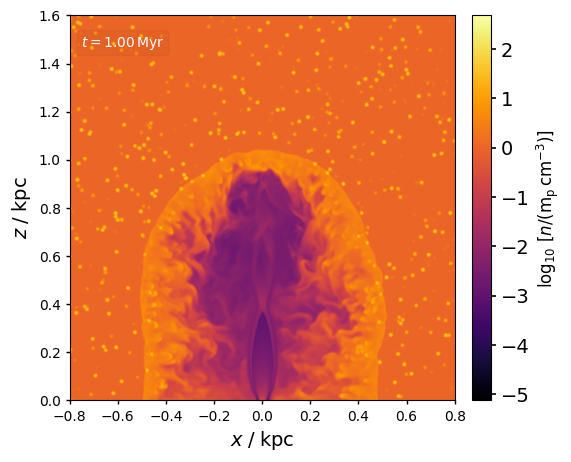

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/density_t1.00Myr.png  (vmin=-5.12, vmax=2.68)


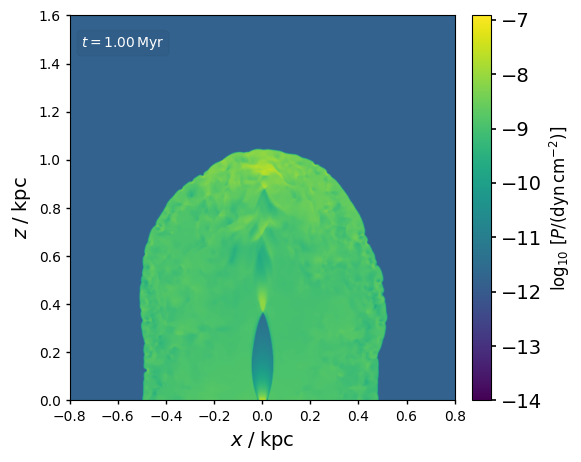

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/pressure_t1.00Myr.png  (vmin=-14.00, vmax=-6.92)


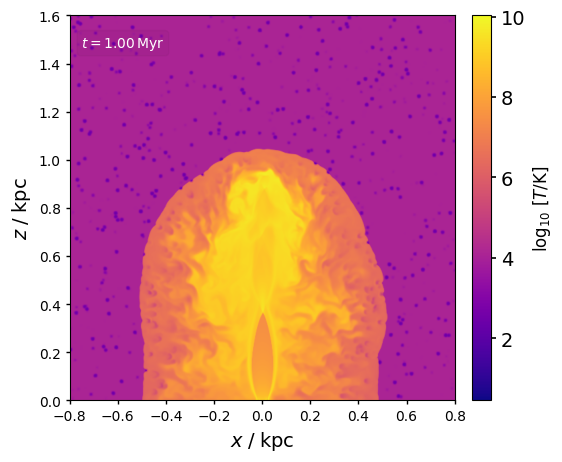

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/temperature_t1.00Myr.png  (vmin=0.45, vmax=10.03)


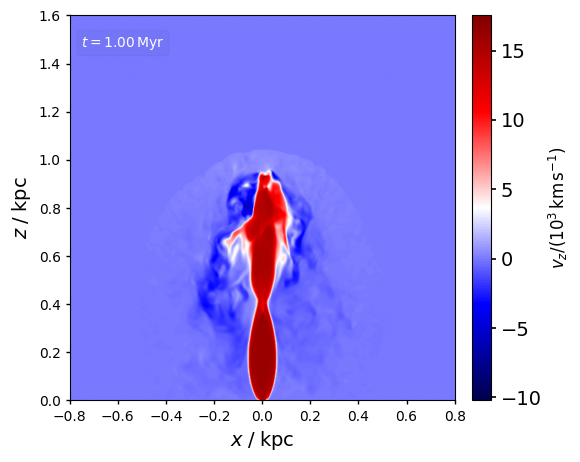

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/velz_t1.00Myr.png  (vmin=-10.22, vmax=17.53)


In [16]:
# ---------- Generate Snapshots ----------
# Target time in Myr
target_time = 1
frame_idx = int(round(target_time / dt_myr))  # closest frame
frame_idx = int(round(target_time / dt_myr))  # closest frame
save_snapshot(dens_list_, "density", frame_idx, cmap="inferno", custom_vmin=-5.12, custom_vmax=2.68)
save_snapshot(pres_list_, "pressure", frame_idx, cmap="viridis", custom_vmin=-14.00, custom_vmax=-6.92)
save_snapshot(temp_list_, "temperature", frame_idx, cmap="plasma", custom_vmin=0.45, custom_vmax=10.03)
save_snapshot(velz_list_, "velz", frame_idx, cmap="seismic", logscale=False, custom_vmin=-10.22, custom_vmax=17.53)

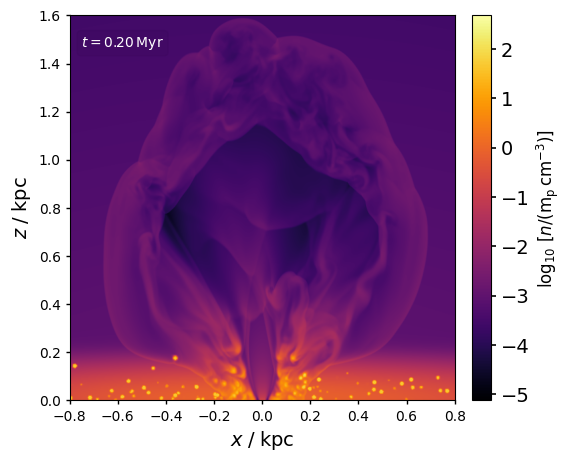

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/density_t0.20Myr.png  (vmin=-5.12, vmax=2.68)


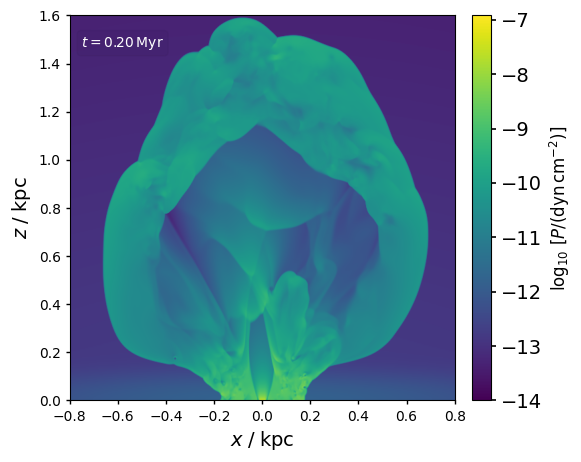

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/pressure_t0.20Myr.png  (vmin=-14.00, vmax=-6.92)


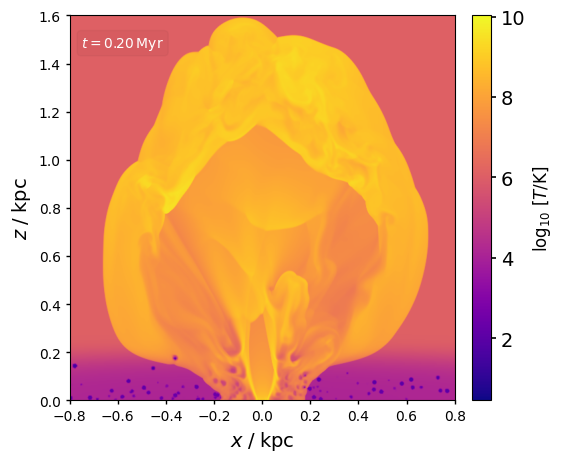

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/temperature_t0.20Myr.png  (vmin=0.45, vmax=10.03)


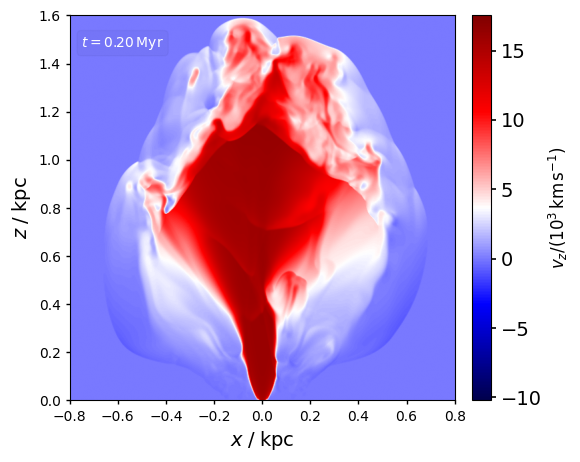

✅ Saved snapshot: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/snapshots_xz/velz_t0.20Myr.png  (vmin=-10.22, vmax=17.53)


In [ ]:
# ---------- Generate Snapshots ----------
# Target time in Myr
target_time = 0.2
frame_idx = int(round(target_time / dt_myr))  # closest frame
frame_idx = int(round(target_time / dt_myr))  # closest frame
save_snapshot(dens_list, "density", frame_idx, cmap="inferno", custom_vmin=-5.12, custom_vmax=2.68)
save_snapshot(pres_list, "pressure", frame_idx, cmap="viridis", custom_vmin=-14.00, custom_vmax=-6.92)
save_snapshot(temp_list, "temperature", frame_idx, cmap="plasma", custom_vmin=0.45, custom_vmax=10.03)
save_snapshot(velz_list, "velz", frame_idx, cmap="seismic", logscale=False, custom_vmin=-10.22, custom_vmax=17.53)

#*Movie-Making Function: Generate and Display Field Animation*

In [ ]:
# ---------- Movie-making function ----------

def make_movie(data_list, field_name, cmap="inferno",
               custom_vmin=None, custom_vmax=None):
    """
    Make a movie for a given field, save it to movie_dir,
    and display it inline in Google Colab.
    """

    # ------------------ vmin/vmax ------------------
    if custom_vmin is None:
        vmin = min(np.min(arr) for arr in data_list)
    else:
        vmin = custom_vmin

    if custom_vmax is None:
        vmax = max(np.max(arr) for arr in data_list)
    else:
        vmax = custom_vmax

    # ------------------ Figure ---------------------
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(
        data_list[0].T,
        origin="lower",
        cmap=cmap,
        extent=extent,
        aspect="equal",
        vmin=vmin,
        vmax=vmax
    )

    # ------------------ Colorbar --------------------
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12, width=1.2)

    if field_name in field_labels:
        cbar.set_label(field_labels[field_name], fontsize=16)
    else:
        cbar.set_label(field_name, fontsize=14)

    ax.set_xlabel(r"$x\;/\;{\rm kpc}$", fontsize=14)
    ax.set_ylabel(r"$z\;/\;{\rm kpc}$", fontsize=14)

    # ------------------ Update function -------------
    def update(frame):
        im.set_array(data_list[frame].T)
        time_myr = frame * dt_myr
        ax.set_title(rf"{field_name}  $t={time_myr:.2f}\,\rm Myr$", fontsize=14)
        return [im]

    # ------------------ Animate ---------------------
    ani = animation.FuncAnimation(
        fig, update, frames=len(data_list), blit=True
    )

    # Save movie
    out_path = os.path.join(movie_dir, f"{field_name}.mp4")
    ani.save(out_path, fps=5, dpi=150)
    plt.close(fig)

    print(f"🎬 Saved movie: {out_path}")

    # ------------------ Show inline ---------------------
    # Convert to base64 so HTML can embed it
    mp4 = open(out_path, "rb").read()
    data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()

    display(HTML(f"""
    <video width="600" controls>
        <source src="{data_url}" type="video/mp4">
    </video>
    """))


#*Produce MP4 Animations of Density, Pressure, Temperature, and Velocity*

In [ ]:
make_movie(dens_list_, "density", cmap="inferno", custom_vmin=-5.12, custom_vmax=2.68)
make_movie(pres_list_, "pressure", cmap="viridis", custom_vmin=-14.0, custom_vmax=-6.92)
make_movie(temp_list_, "temperature", cmap="plasma",custom_vmin=0.45, custom_vmax=10.03)
make_movie(velz_list_, "velz", cmap="seismic", custom_vmin=-10.22, custom_vmax=17.53)

🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/density.mp4


🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/pressure.mp4


🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/temperature.mp4


🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/velz.mp4


In [ ]:
make_movie(dens_list, "density", cmap="inferno", custom_vmin=-5.12, custom_vmax=2.68)
make_movie(pres_list, "pressure", cmap="viridis", custom_vmin=-14.0, custom_vmax=-6.92)
make_movie(temp_list, "temperature", cmap="plasma",custom_vmin=0.45, custom_vmax=10.03)
make_movie(velz_list, "velz", cmap="seismic", custom_vmin=-10.22, custom_vmax=17.53)

🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/density.mp4


🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/pressure.mp4


🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/temperature.mp4


🎬 Saved movie: /content/drive/MyDrive/Colab Notebooks/astrophysical_jets/movies_xz/velz.mp4


#*Identify Bubble Region in 2D by Applying Pressure Threshold*

In [ ]:
def get_bubble_mask_2d(pres, threshold):
    nx, nz = pres.shape

    above = pres > threshold   # shape (nx, nz)

    # For each z-column, find first and last x where condition is true
    first_idx = np.argmax(above, axis=0)       # (nz,) #location of first True
    any_true = np.any(above, axis=0)           # (nz,) #whether there is any True value at this height
    last_idx = nx - np.argmax(above[::-1, :], axis=0)  #location of first True in reversed array

    x = np.arange(nx)[:, None]                 # (nx,1)

    mask = (x >= first_idx[None, :]) & (x < last_idx[None, :]) & any_true[None, :]

    return mask      # shape (nx, nz)


#*Read HDF5 Fields, Compute Thermodynamic Quantities, and Accumulate Bubble Energy Data*

**For Uniform Case**

In [ ]:
# ---------- Load fields ----------
dens_list_, pres_list_, temp_list_,velz_list_ = [], [], [], []
times_, E_th_bub_list_, E_ke_bub_list_ = [],[],[]


for fname_ in files_:
    with h5py.File(os.path.join(h5_dir_, fname_), "r") as f:
        dens_ = f["dens"][:, :]
        eint_ = f["eint"][:, :]
        velx_ = f["velx"][:, :]
        vely_ = f["vely"][:, :]
        velz_ = f["velz"][:, :]
        dims_ = f.attrs["dims"]

    # Pressure
    pres_ = np.maximum((gm - 1.0) * eint_ * 1.67e-8, 1e-14)

    # Temperature
    T_ = np.maximum((pres_ * mu) / (dens_ * kb), 1)

    # Append fields
    dens_list_.append(np.log10(dens_ + 1e-40))
    pres_list_.append(np.log10(pres_ + 1e-40))
    temp_list_.append(np.log10(T_ + 1e-40))
    velz_list_.append(velz_)


    nx, nz = dims_
    dx = box_size_kpc / nx   # kpc
    dz = box_size_kpc / nz   # kpc
    dy = 1
    Vcell = dx * dy * dz * (3.086e21)**3   # cm^3

    velsq_ = (velx_*1e8)**2 + (vely_*1e8)**2 + (velz_*1e8)**2 #in cm/s
    ke_ = 0.5 * dens_ * mp * velsq_ #KE in cgs
    u_ = eint_ * 1.67e-8            #thermal energy in CGS
    threshold =1e-11                #threshold for identifying over-pressured bubble
    bubble_mask = get_bubble_mask_2d(pres_, threshold)
    ke_bub_ = np.where(bubble_mask, ke_, 0.0) #KE energy of cells identified as part of bubble
    u_bub_ = np.where(bubble_mask, u_, 0.0)
    E_th_bubble_ = np.sum(u_bub_ * Vcell)       # Thermal
    E_ke_bubble_ = np.sum(ke_bub_ * Vcell)      # Kinetic
    E_th_bub_list_.append(E_th_bubble_)         #append to the list
    E_ke_bub_list_.append(E_ke_bubble_)
    # ---- extract numeric frame index ----
    frame_ = int(fname_.split('data_t')[1].split('.h5')[0])
    time_ = frame_ * 0.04
    times_.append(time_)


**For Stratified Case**

In [ ]:
# ---------- Load fields ----------
dens_list, pres_list, temp_list, velz_list = [], [], [], []
times, E_th_bub_list, E_ke_bub_list = [],[],[]


for fname in files:
    with h5py.File(os.path.join(h5_dir, fname), "r") as f:
        dens = f["dens"][:, :]
        eint = f["eint"][:, :]
        velx = f["velx"][:, :]
        vely = f["vely"][:, :]
        velz = f["velz"][:, :]
        dims = f.attrs["dims"]

    # Pressure
    pres = np.maximum((gm - 1.0) * eint * 1.67e-8, 1e-14)

    # Temperature
    T = np.maximum((pres * mu) / (dens * kb), 1)

    # Append fields
    dens_list.append(np.log10(dens + 1e-40))
    pres_list.append(np.log10(pres + 1e-40))
    temp_list.append(np.log10(T + 1e-40))
    velz_list.append(velz)


    nx, nz = dims
    dx = box_size_kpc / nx   # kpc
    dz = box_size_kpc / nz   # kpc
    dy = 1
    Vcell = dx * dy * dz * (3.086e21)**3   # cm^3

    velsq = (velx*1e8)**2 + (vely*1e8)**2 + (velz*1e8)**2 #in cm/s
    ke = 0.5 * dens * mp * velsq
    u = eint * 1.67e-8
    threshold =1e-11
    bubble_mask = get_bubble_mask_2d(pres, threshold)
    ke_bub = np.where(bubble_mask, ke, 0.0)
    u_bub = np.where(bubble_mask, u, 0.0)
    E_th_bubble = np.sum(u_bub * Vcell)       # Thermal
    E_ke_bubble = np.sum(ke_bub * Vcell)       # Kinetic
    E_th_bub_list.append(E_th_bubble)
    E_ke_bub_list.append(E_ke_bubble)
    # ---- extract numeric frame index ----
    frame = int(fname.split('data_t')[1].split('.h5')[0])
    time = frame * 0.04
    times.append(time)


In [ ]:
#convert list to arrays
E_th_bub_arr = np.array(E_th_bub_list)
E_ke_bub_arr = np.array(E_ke_bub_list)
times = np.array(times)
E_th_bub_arr_ = np.array(E_th_bub_list_)
E_ke_bub_arr_ = np.array(E_ke_bub_list_)
times_ = np.array(times_)

#*Function: Plot Thermal & Kinetic Bubble Energies*

In [ ]:
def plot_bubble_energies(times, E_th_bub_arr, E_ke_bub_arr):
    """
    Plot Thermal & Kinetic Energies inside the Bubble.
    """

    plt.figure(figsize=(8,5))

    # Thermal Energy
    plt.plot(times, E_th_bub_arr, '-', alpha=0.7, lw=1.2, label="Thermal Energy")
    plt.scatter(times, E_th_bub_arr, s=20, marker='o')

    # Kinetic Energy
    plt.plot(times, E_ke_bub_arr, '-', alpha=0.7, lw=1.2, label="Kinetic Energy")
    plt.scatter(times, E_ke_bub_arr, s=20, marker='s')

    # Labels and formatting
    plt.xlabel("Time [Myr]", fontsize=14)
    plt.ylabel("Energy [erg]", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # plt.yscale("log")  # enable if needed
    plt.title("Thermal & Kinetic Energies inside Bubble", fontsize=16)
    plt.legend(fontsize=10)

    plt.grid(True, ls="--", alpha=0.6)
    plt.tight_layout()

    plt.show()
    plt.close()


#*Calling the function*

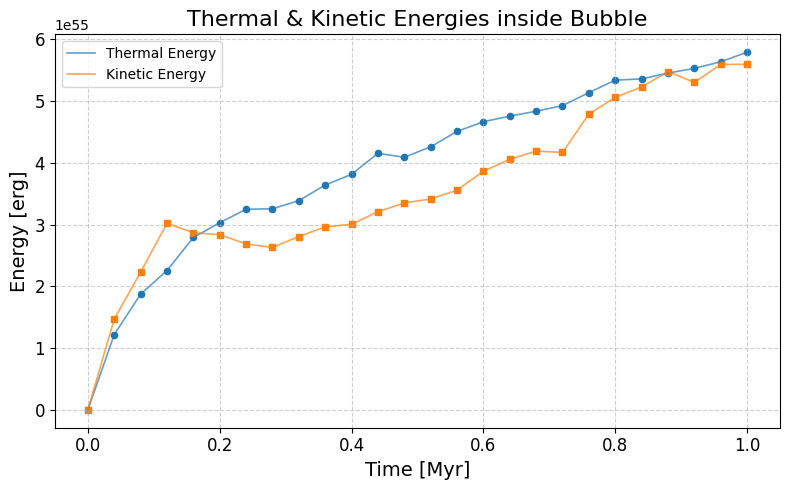

In [ ]:
plot_bubble_energies(times_, E_th_bub_arr_, E_ke_bub_arr_)

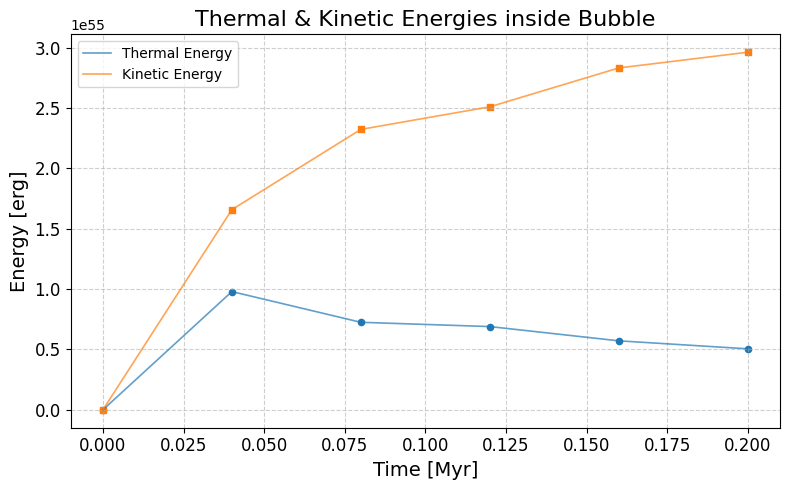

In [ ]:
plot_bubble_energies(times, E_th_bub_arr, E_ke_bub_arr)

**Recap**

What did we do?

- read 2D hdf data from a test problem that simulates a hydro jet running into a uniform and stratified media with dense clouds

- made plots of fields such as density, pressure, vertical velocity at a given time

- created movies by animating together different snapshots

- analyzed volume integrated quantities versus time


This is a typical workflow of a typical simulation project. There are many other ways of visualizing simulation outputs but diagnostics are absolutely crucial to debug the code and to understand what's going on.

For more on Computational Astrophysics:

**For more** Check out [this YouTube Playlist](https://youtube.com/playlist?list=PLJxtWIpdsZWoZpOIEK0YrM94y5dOL22Vf&si=E31A7pI2x4K1uWsy) from a 2023 workshop at IISc on Computational Astrophysics.

